In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.preprocessing import LabelEncoder, minmax_scale
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
wisc = pd.read_csv("E:/Python Programs/wisc_bc_data.csv")
wisc.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [3]:
X = wisc[["radius_mean", "concave points_mean", "concavity_mean"]]
y = wisc["diagnosis"]

In [4]:
X_scaled = pd.DataFrame(minmax_scale(X), columns=X.columns)

In [6]:
encoding = LabelEncoder()
y = encoding.fit_transform(y)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, random_state=10, stratify=y)
X_train.shape, X_test.shape

((426, 3), (143, 3))

In [15]:
dt_model = DecisionTreeClassifier(criterion='entropy')
dt_model.fit(X_train, y_train)
dt_model.score(X_train, y_train), dt_model.score(X_test, y_test)

(1.0, 0.8881118881118881)

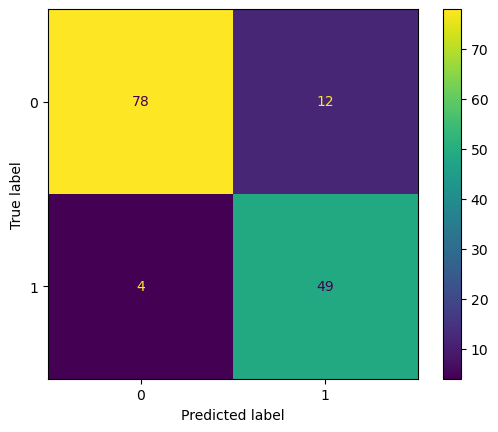

In [16]:
ConfusionMatrixDisplay.from_estimator(dt_model, X_test, y_test)
plt.show()

In [19]:
knn_model = KNeighborsClassifier(n_neighbors=9, weights="distance")
knn_model.fit(X_train, y_train)
knn_model.score(X_train, y_train), knn_model.score(X_test, y_test)

(1.0, 0.9440559440559441)

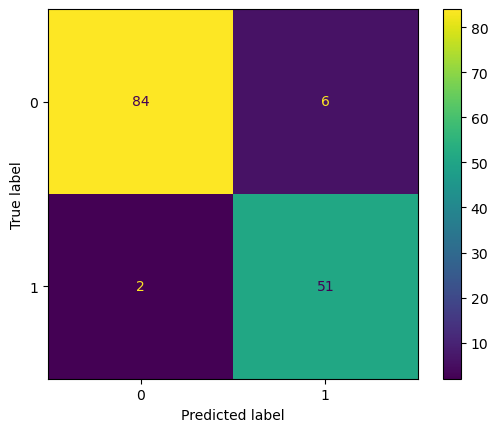

In [20]:
ConfusionMatrixDisplay.from_estimator(knn_model, X_test, y_test)
plt.show()

In [28]:
rf_model = RandomForestClassifier(n_estimators=5, criterion="entropy", max_samples=400)
rf_model.fit(X_train, y_train)
rf_model.score(X_train, y_train), rf_model.score(X_test, y_test)

(0.9835680751173709, 0.9370629370629371)

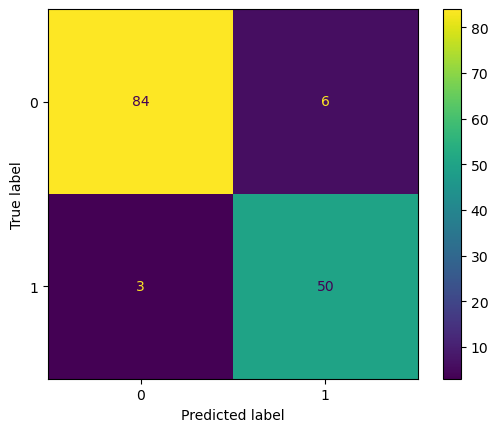

In [29]:
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test)
plt.show()

In [30]:
rf_model.estimators_

[DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                        random_state=1064096398),
 DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                        random_state=736592841),
 DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                        random_state=396627785),
 DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                        random_state=1746129748),
 DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                        random_state=843561012)]

In [31]:
rf_model.estimators_[0].score(X_test, y_test), rf_model.estimators_[1].score(X_test, y_test), rf_model.estimators_[2].score(X_test, y_test), rf_model.estimators_[3].score(X_test, y_test), rf_model.estimators_[4].score(X_test, y_test)

(0.9230769230769231,
 0.9230769230769231,
 0.916083916083916,
 0.8951048951048951,
 0.8671328671328671)

In [35]:
bgdt_model = BaggingClassifier(estimator=DecisionTreeClassifier(criterion="entropy"), n_estimators=50, bootstrap=True,
                         max_samples=400)
bgdt_model.fit(X_train, y_train)
bgdt_model.score(X_train, y_train), bgdt_model.score(X_test, y_test)

(0.9976525821596244, 0.9440559440559441)

In [39]:
bgdt_model.estimators_samples_

[array([ 74, 212,  74,  74, 269,  15,  24,  54,  71, 298, 224, 304,  43,
         50,  94, 335,  67, 215, 256, 239, 293, 335,  96, 140,  10, 331,
        356, 312,  42, 374, 415, 181, 265, 235, 176,   4, 222, 289, 262,
        361,  54,  79, 154, 225, 224, 193, 338, 248, 412, 223, 225, 380,
        403, 221, 389, 350, 381, 319, 252, 241,  28, 137, 125, 170, 133,
        143, 292, 254, 185,  40, 388, 214, 228, 327,  37,  37, 125,  61,
        294, 151, 390, 229, 257, 116, 316, 108, 136, 125, 217, 280, 411,
        133, 210, 206,  69, 331, 338, 127, 102,  97, 258,  57, 409,  71,
        103, 159,  42, 250, 190, 346, 385,  10, 345, 192, 304, 309, 241,
        111, 320, 167, 112, 248,  92, 308, 241, 351, 133, 347, 119, 162,
         51, 306,  60, 109, 176,   3, 219, 269, 275, 351,  91, 380, 112,
        306, 111, 388,  69, 367,  63, 174,  83, 197, 275, 142, 314, 100,
        138,  88, 234, 248,  91, 199, 291, 339, 287, 116, 105,  78, 247,
        162,  70, 216,  83, 321, 256, 412, 190, 371

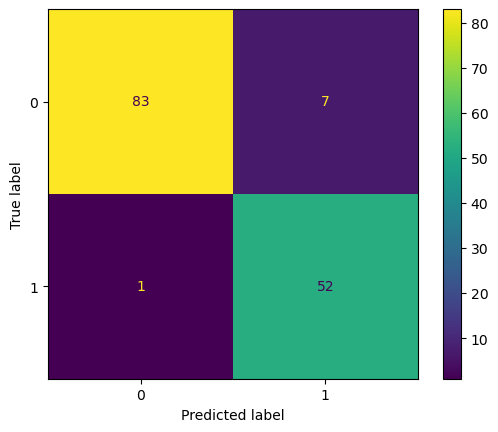

In [36]:
ConfusionMatrixDisplay.from_estimator(bgdt_model, X_test, y_test)
plt.show()

In [37]:
bgknn_model = BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=9, weights="distance"),
                         n_estimators=50, bootstrap=True, max_samples=400)
bgknn_model.fit(X_train, y_train)
bgknn_model.score(X_train, y_train), bgknn_model.score(X_test, y_test)

(0.9976525821596244, 0.9300699300699301)

In [40]:
bgknn_model.estimators_samples_

[array([291, 342, 244,  69, 339, 254,  19, 284,  95, 397, 256, 370,  38,
         31, 235, 190, 251, 360, 327, 333,  56,  69,  47, 286, 119,  91,
        254, 279, 238, 356,  26,  98, 417, 209, 234,  75,  30, 131, 217,
        173, 112,  18,   9, 148,  48, 254,  16, 359,  73, 344, 423, 133,
        386, 338,  26, 354,  60, 135, 208, 143, 422,  17,  24, 331, 237,
        264, 230, 194, 407, 348, 355, 272, 386, 190, 258, 185, 289, 254,
        144,  11, 257, 324, 112,   3, 187,  20, 153, 363, 289, 248, 292,
          2, 417,   0, 348, 208, 362,  57, 162, 362, 205, 159, 323, 421,
         89,  58,  69,  17, 331, 113, 328, 285, 365, 153, 192, 207, 203,
        340, 239, 138, 295, 395, 357, 359,  12,  48, 132,  29, 176, 307,
        112, 243, 265, 357,  30,  43, 233, 163, 166, 425,  41,  21, 420,
        202,  20, 343, 199, 325, 285, 356, 166, 178,  65, 235, 372, 301,
         96, 277,  87, 126, 268, 150, 415,  72, 180, 269, 148,  44, 367,
         56,  50, 122,   6, 139, 181, 101,  41, 373

In [41]:
bgknn_model.estimators_samples_[0]

array([291, 342, 244,  69, 339, 254,  19, 284,  95, 397, 256, 370,  38,
        31, 235, 190, 251, 360, 327, 333,  56,  69,  47, 286, 119,  91,
       254, 279, 238, 356,  26,  98, 417, 209, 234,  75,  30, 131, 217,
       173, 112,  18,   9, 148,  48, 254,  16, 359,  73, 344, 423, 133,
       386, 338,  26, 354,  60, 135, 208, 143, 422,  17,  24, 331, 237,
       264, 230, 194, 407, 348, 355, 272, 386, 190, 258, 185, 289, 254,
       144,  11, 257, 324, 112,   3, 187,  20, 153, 363, 289, 248, 292,
         2, 417,   0, 348, 208, 362,  57, 162, 362, 205, 159, 323, 421,
        89,  58,  69,  17, 331, 113, 328, 285, 365, 153, 192, 207, 203,
       340, 239, 138, 295, 395, 357, 359,  12,  48, 132,  29, 176, 307,
       112, 243, 265, 357,  30,  43, 233, 163, 166, 425,  41,  21, 420,
       202,  20, 343, 199, 325, 285, 356, 166, 178,  65, 235, 372, 301,
        96, 277,  87, 126, 268, 150, 415,  72, 180, 269, 148,  44, 367,
        56,  50, 122,   6, 139, 181, 101,  41, 373, 399, 393, 34

In [42]:
bgknn_model.estimators_samples_[0].shape

(400,)

In [43]:
np.unique(bgknn_model.estimators_samples_[0])

array([  0,   2,   3,   4,   6,   7,   9,  11,  12,  14,  15,  16,  17,
        18,  19,  20,  21,  23,  24,  25,  26,  29,  30,  31,  32,  34,
        35,  37,  38,  41,  42,  43,  44,  46,  47,  48,  49,  50,  55,
        56,  57,  58,  59,  60,  61,  63,  65,  69,  70,  72,  73,  75,
        76,  78,  79,  83,  85,  86,  87,  88,  89,  90,  91,  92,  94,
        95,  96,  98,  99, 101, 105, 106, 110, 112, 113, 116, 118, 119,
       121, 122, 123, 124, 126, 130, 131, 132, 133, 135, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 148, 149, 150, 153, 154, 157, 159,
       161, 162, 163, 165, 166, 168, 169, 170, 173, 174, 176, 178, 179,
       180, 181, 185, 187, 189, 190, 191, 192, 193, 194, 197, 198, 199,
       202, 203, 204, 205, 207, 208, 209, 210, 216, 217, 218, 220, 223,
       224, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 243,
       244, 247, 248, 250, 251, 254, 256, 257, 258, 262, 263, 264, 265,
       268, 269, 271, 272, 273, 277, 279, 280, 284, 285, 286, 28

In [44]:
np.unique(bgknn_model.estimators_samples_[0]).shape

(259,)

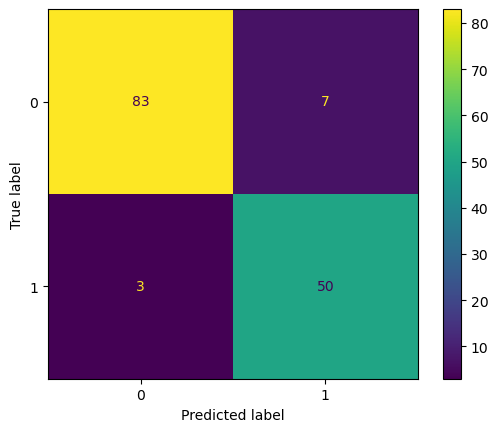

In [38]:
ConfusionMatrixDisplay.from_estimator(bgknn_model, X_test, y_test)
plt.show()

In [46]:
bglr_model = BaggingClassifier(estimator=LogisticRegression(),
                         n_estimators=50, bootstrap=True, max_samples=400)
bglr_model.fit(X_train, y_train)
bglr_model.score(X_train, y_train), bglr_model.score(X_test, y_test)

(0.9154929577464789, 0.9370629370629371)

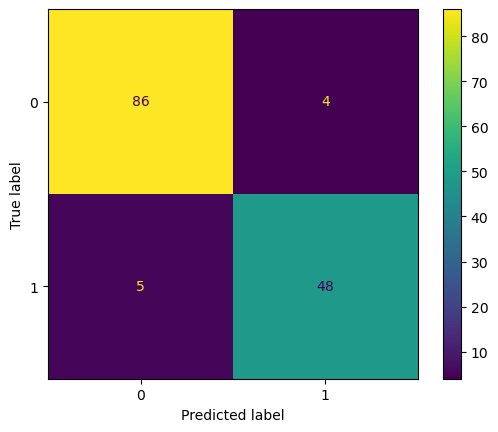

In [47]:
ConfusionMatrixDisplay.from_estimator(bglr_model, X_test, y_test)
plt.show()